# FINAL PROJECT

<b>Submitted By:</b> Abhigyan Misra


The data being analysed is Clinical Data for patients with Cardio Vascular Diseases.
I will be analyzing the mortality conditions with different parameters in the file.

The data has been taken from www.kaggle.com


Link - https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

Authors of the Dataset - Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). 




Final Project - Requirements

Add the following to your GitHub repository.  

1. Your dataset - DONE

2. A PowerPoint presentation outlining your statistical question/hypothesis - DONE
    
    a. A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1). - DONE
    
    b. Describe what the 5 variables mean in the dataset (Chapter 1). - DONE
    
    c. Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2). - DONE
    
    d. Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2). - DONE
    
    e. Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3). - DONE
    
    f. Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4). - DONE
    
    g. Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5). DONE
    
    h. Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7). - DONE
    
    i. Conduct a test on your hypothesis using one of the methods covered in Chapter 9. - DONE
    
    j. For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11). - DONE

3. Your code or screenshots of your code - DONE

4. A 250-500-word paper summarizing the following: Statistical/Hypothetical Question - DONE
    a. Outcome of your EDA
    
    b. What do you feel was missed during the analysis?
    
    c. Were there any variables you felt could have helped in the analysis?
    
    d. Were there any assumptions made you felt were incorrect?
    
    e. What challenges did you face, what did you not fully understand?

5. Submit a link to your repository to the assignment link during the final week of class. - DONE


# Start Solution
Reading the Clinical File and Converting to Dataframe

In [1]:
import pandas;

def readFile(f="heart_failure_clinical_records_dataset.csv", seperator=","):
    print("START READING")
    df = pandas.read_csv(f,sep=seperator)
    print("END READING")
    return df
    
clinical_df = readFile()
    
print(clinical_df)


START READING
END READING
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creati

In [2]:
import thinkstats2
import thinkplot

## DO SOME VALIDATION FOR DATA ?? DO MORE
## THE DATA IS VERY CLEAN AND HAS A RATING OF 10.0 ON KAGGLE
## SO EXCEPT COUNTING THE RECORDS, NOT SURE WHAT ELSE COULD BE DONE

In [3]:
# creating separate df from dead and alive patients
# For our analysis, df of dead patients is more important
dead = clinical_df[clinical_df.DEATH_EVENT == 1]
alive = clinical_df[clinical_df.DEATH_EVENT == 0]
print("DEAD:",len(dead))
print("ALIVE:",len(alive))
print("TOTAL:",len(clinical_df))

DEAD: 96
ALIVE: 203
TOTAL: 299


Histograms for the variables being analysed
1.	Age of Patient
2.	CPK Levels
3.	Ejection Fraction
4.	Platelets
5.	Serum Creatinine
6.	Serum Sodium


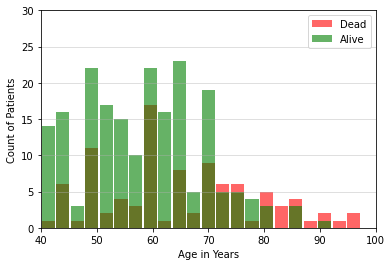

In [4]:
import matplotlib.pyplot as plt
import numpy as np;

# Histogram plots for Age of Patient
binBoundaries = np.linspace(40,100,24)
plt.hist(x=dead.age, bins=binBoundaries, color='red', alpha=0.6, rwidth=0.9, label = "Dead")
plt.hist(x=alive.age, bins=binBoundaries, color='green', alpha=0.6, rwidth=0.9, label = "Alive")
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Age in Years')
plt.ylabel('Count of Patients')
plt.xlim(40,100)
plt.ylim(0,30)
plt.show()

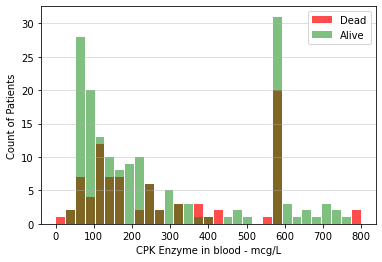

In [5]:
# Histogram plots for CPK
binBoundaries = np.linspace(0,800,32)
plt.hist(x=dead.creatinine_phosphokinase, bins=binBoundaries, color='red', alpha=0.7, rwidth=0.9, label = "Dead")
plt.hist(x=alive.creatinine_phosphokinase, bins=binBoundaries, color='green', alpha=0.5, rwidth=0.9, label = "Alive")
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('CPK Enzyme in blood - mcg/L')
plt.ylabel('Count of Patients')
#plt.xlim(40,100)
#plt.ylim(0,30)
plt.show()

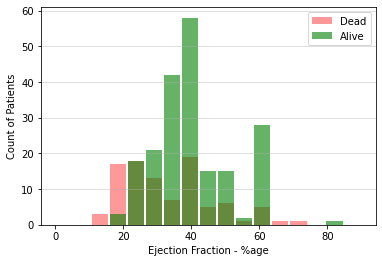

In [6]:
# Histogram plots for Ejection Fraction
binBoundaries = np.linspace(0,90,18)
plt.hist(x=dead.ejection_fraction, bins=binBoundaries, color='red', alpha=0.4, rwidth=0.9, label = "Dead")
plt.hist(x=alive.ejection_fraction, bins=binBoundaries, color='green', alpha=0.6, rwidth=0.9, label = "Alive")
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Ejection Fraction - %age')
plt.ylabel('Count of Patients')
plt.show()

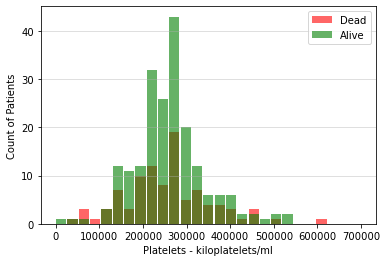

In [7]:
# Histogram plots for Platelets Count
binBoundaries = np.linspace(0, 700000, 28)
plt.hist(x=dead.platelets, bins=binBoundaries, color='red', alpha=0.6, rwidth=0.9, label = "Dead")
plt.hist(x=alive.platelets, bins=binBoundaries, color='green', alpha=0.6, rwidth=0.9, label = "Alive")
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Platelets - kiloplatelets/ml')
plt.ylabel('Count of Patients')
plt.show()

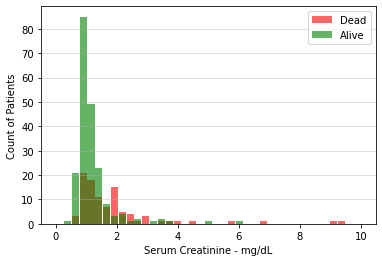

In [8]:
# Histogram plots for Serum Creatinine
binBoundaries = np.linspace(0, 10, 40)
plt.hist(x=dead.serum_creatinine, bins=binBoundaries, color='red', alpha=0.6, rwidth=0.9, label = "Dead")
plt.hist(x=alive.serum_creatinine, bins=binBoundaries, color='green', alpha=0.6, rwidth=0.9, label = "Alive")
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Serum Creatinine - mg/dL')
plt.ylabel('Count of Patients')
plt.show()

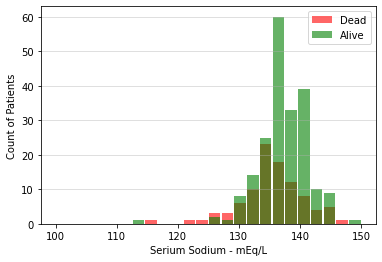

In [9]:
# Histogram plots for Serium Sodium
binBoundaries = np.linspace(100, 150, 25)
plt.hist(x=dead.serum_sodium, bins=binBoundaries, color='red', alpha=0.6, rwidth=0.9, label = "Dead")
plt.hist(x=alive.serum_sodium, bins=binBoundaries, color='green', alpha=0.6, rwidth=0.9, label = "Alive")
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Serium Sodium - mEq/L')
plt.ylabel('Count of Patients')
plt.show()

In [10]:
# Mean, Mode, Spread and Tails - Age of Patient
meanAlive = alive.age.mean()
meanDead = dead.age.mean()
modeAlive = alive.age.mode()
modeDead = dead.age.mode()
varAlive = alive.age.var()
varDead = dead.age.var()
stdAlive = alive.age.std()
stdDead = dead.age.std()

print("Mean Age (Alive): ",meanAlive)
print("Mean Age (Dead): ",meanDead)
print("Mode Age (Alive): ",modeAlive)
print("Mode Age (Dead): ",modeDead)
print("Variance Age (Alive): ",varAlive)
print("Variance Age (Dead): ",varDead)
print("Standard Deviation Age (Alive): ",stdAlive)
print("Standard Deviation Age (Dead): ",stdDead)

Mean Age (Alive):  58.76190640394089
Mean Age (Dead):  65.21528125
Mode Age (Alive):  0    60.0
dtype: float64
Mode Age (Dead):  0    60.0
dtype: float64
Variance Age (Alive):  113.1647084713947
Variance Age (Dead):  174.62448075164468
Standard Deviation Age (Alive):  10.637890226515534
Standard Deviation Age (Dead):  13.214555639583372


In [11]:
# Mean, Mode, Spread and Tails - CPK Enzyme
meanAlive = alive.creatinine_phosphokinase.mean()
meanDead = dead.creatinine_phosphokinase.mean()
modeAlive = alive.creatinine_phosphokinase.mode()
modeDead = dead.creatinine_phosphokinase.mode()
varAlive = alive.creatinine_phosphokinase.var()
varDead = dead.creatinine_phosphokinase.var()
stdAlive = alive.creatinine_phosphokinase.std()
stdDead = dead.creatinine_phosphokinase.std()

print("Mean CPK Enzyme (Alive): ",meanAlive)
print("Mean CPK Enzyme (Dead): ",meanDead)
print("Mode CPK Enzyme (Alive): ",modeAlive)
print("Mode CPK Enzyme (Dead): ",modeDead)
print("Variance CPK Enzyme (Alive): ",varAlive)
print("Variance CPK Enzyme (Dead): ",varDead)
print("Standard Deviation CPK Enzyme (Alive): ",stdAlive)
print("Standard Deviation CPK Enzyme (Dead): ",stdDead)

Mean CPK Enzyme (Alive):  540.0541871921182
Mean CPK Enzyme (Dead):  670.1979166666666
Mode CPK Enzyme (Alive):  0    582
dtype: int64
Mode CPK Enzyme (Dead):  0    582
dtype: int64
Variance CPK Enzyme (Alive):  568213.7940789146
Variance CPK Enzyme (Dead):  1733384.5814692995
Standard Deviation CPK Enzyme (Alive):  753.7995715566005
Standard Deviation CPK Enzyme (Dead):  1316.5806399417013


In [12]:
# Mean, Mode, Spread and Tails - Ejection Fraction
meanAlive = alive.ejection_fraction.mean()
meanDead = dead.ejection_fraction.mean()
modeAlive = alive.ejection_fraction.mode()
modeDead = dead.ejection_fraction.mode()
varAlive = alive.ejection_fraction.var()
varDead = dead.ejection_fraction.var()
stdAlive = alive.ejection_fraction.std()
stdDead = dead.ejection_fraction.std()

print("Mean Ejection Fraction (Alive): ",meanAlive)
print("Mean Ejection Fraction (Dead): ",meanDead)
print("Mode Ejection Fraction (Alive): ",modeAlive)
print("Mode Ejection Fraction (Dead): ",modeDead)
print("Variance Ejection Fraction (Alive): ",varAlive)
print("Variance Ejection Fraction (Dead): ",varDead)
print("Standard Deviation Ejection Fraction (Alive): ",stdAlive)
print("Standard Deviation Ejection Fraction (Dead): ",stdDead)

Mean Ejection Fraction (Alive):  40.26600985221675
Mean Ejection Fraction (Dead):  33.46875
Mode Ejection Fraction (Alive):  0    35
dtype: int64
Mode Ejection Fraction (Dead):  0    25
dtype: int64
Variance Ejection Fraction (Alive):  117.93878944544699
Variance Ejection Fraction (Dead):  156.88322368421052
Standard Deviation Ejection Fraction (Alive):  10.859962681586294
Standard Deviation Ejection Fraction (Dead):  12.52530333701386


In [13]:
# Mean, Mode, Spread and Tails - Platelets Count
meanAlive = alive.platelets.mean()
meanDead = dead.platelets.mean()
modeAlive = alive.platelets.mode()
modeDead = dead.platelets.mode()
varAlive = alive.platelets.var()
varDead = dead.platelets.var()
stdAlive = alive.platelets.std()
stdDead = dead.platelets.std()

print("Mean Platelets (Alive): ",meanAlive)
print("Mean Platelets (Dead): ",meanDead)
print("Mode Platelets (Alive): ",modeAlive)
print("Mode Platelets (Dead): ",modeDead)
print("Variance Platelets (Alive): ",varAlive)
print("Variance Platelets (Dead): ",varDead)
print("Standard Deviation Platelets (Alive): ",stdAlive)
print("Standard Deviation Platelets (Dead): ",stdDead)

Mean Platelets (Alive):  266657.4899014779
Mean Platelets (Dead):  256381.0447916667
Mode Platelets (Alive):  0    263358.03
dtype: float64
Mode Platelets (Dead):  0    263358.03
dtype: float64
Variance Platelets (Alive):  9512335418.857391
Variance Platelets (Dead):  9707310182.337013
Standard Deviation Platelets (Alive):  97531.20228346101
Standard Deviation Platelets (Dead):  98525.68285648678


In [14]:
# Mean, Mode, Spread and Tails - Serum Creatinine
meanAlive = alive.serum_creatinine.mean()
meanDead = dead.serum_creatinine.mean()
modeAlive = alive.serum_creatinine.mode()
modeDead = dead.serum_creatinine.mode()
varAlive = alive.serum_creatinine.var()
varDead = dead.serum_creatinine.var()
stdAlive = alive.serum_creatinine.std()
stdDead = dead.serum_creatinine.std()

print("Mean Serum Creatinine (Alive): ",meanAlive)
print("Mean Serum Creatinine (Dead): ",meanDead)
print("Mode Serum Creatinine (Alive): ",modeAlive)
print("Mode Serum Creatinine (Dead): ",modeDead)
print("Variance Serum Creatinine (Alive): ",varAlive)
print("Variance Serum Creatinine (Dead): ",varDead)
print("Standard Deviation Serum Creatinine (Alive): ",stdAlive)
print("Standard Deviation Serum Creatinine (Dead): ",stdDead)

Mean Serum Creatinine (Alive):  1.184876847290641
Mean Serum Creatinine (Dead):  1.8358333333333332
Mode Serum Creatinine (Alive):  0    1.0
dtype: float64
Mode Serum Creatinine (Dead):  0    1.0
dtype: float64
Variance Serum Creatinine (Alive):  0.42782411842169504
Variance Serum Creatinine (Dead):  2.1566729824561404
Standard Deviation Serum Creatinine (Alive):  0.6540826541207885
Standard Deviation Serum Creatinine (Dead):  1.4685615351275343


In [15]:
# Mean, Mode, Spread and Tails - Serum Sodium
meanAlive = alive.serum_sodium.mean()
meanDead = dead.serum_sodium.mean()
modeAlive = alive.serum_sodium.mode()
modeDead = dead.serum_sodium.mode()
varAlive = alive.serum_sodium.var()
varDead = dead.serum_sodium.var()
stdAlive = alive.serum_sodium.std()
stdDead = dead.serum_sodium.std()

print("Mean Serum Sodium (Alive): ",meanAlive)
print("Mean Serum Sodium (Dead): ",meanDead)
print("Mode Serum Sodium (Alive): ",modeAlive)
print("Mode Serum Sodium (Dead): ",modeDead)
print("Variance Serum Sodium (Alive): ",varAlive)
print("Variance Serum Sodium (Dead): ",varDead)
print("Standard Deviation Serum Sodium (Alive): ",stdAlive)
print("Standard Deviation Serum Sodium (Dead): ",stdDead)

Mean Serum Sodium (Alive):  137.2167487684729
Mean Serum Sodium (Dead):  135.375
Mode Serum Sodium (Alive):  0    137
dtype: int64
Mode Serum Sodium (Dead):  0    134
dtype: int64
Variance Serum Sodium (Alive):  15.863678486075212
Variance Serum Sodium (Dead):  25.01578947368421
Standard Deviation Serum Sodium (Alive):  3.9829233593022115
Standard Deviation Serum Sodium (Dead):  5.00157869813964


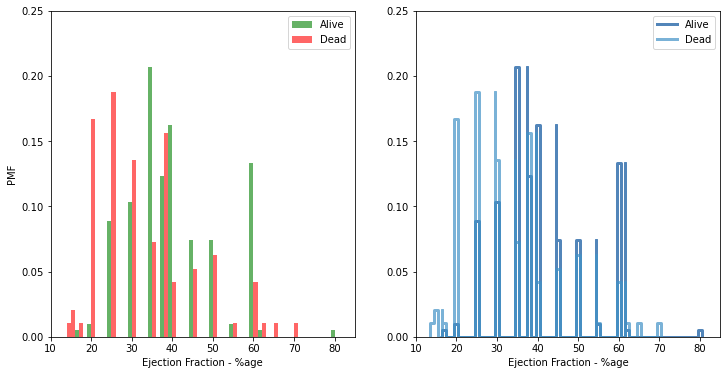

In [16]:
# Comparing Ejection Fraction in Alive vs Dead Patients
pmfAliveEF = thinkstats2.Pmf(alive.ejection_fraction, label='Alive')
pmfDeadEF = thinkstats2.Pmf(dead.ejection_fraction, label='Dead')

width=1
axis = [10, 85, 0, 0.25]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmfAliveEF, align='right', width=width, color = 'green')
thinkplot.Hist(pmfDeadEF, align='left', width=width, color = 'red')
thinkplot.Config(xlabel='Ejection Fraction - %age', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmfAliveEF, pmfDeadEF],width=width)
thinkplot.Config(xlabel='Ejection Fraction - %age', axis=axis)

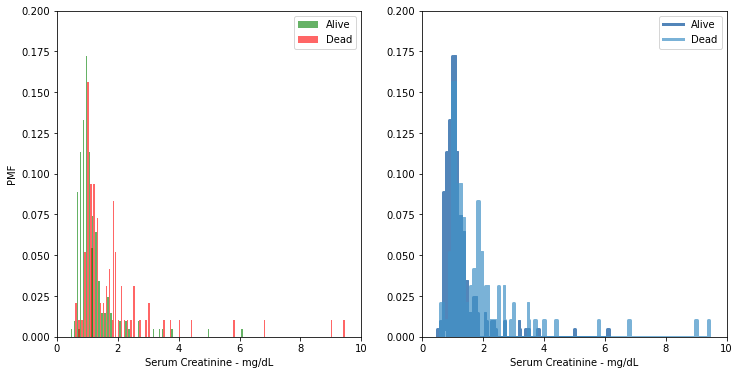

In [17]:
# Comparing Serum Creatinine in Alive vs Dead Patients
pmfAliveSC = thinkstats2.Pmf(alive.serum_creatinine, label='Alive')
pmfDeadSC = thinkstats2.Pmf(dead.serum_creatinine, label='Dead')

width=0.05
axis = [0, 10, 0, 0.20]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmfAliveSC, align='right', width=width, color = 'green')
thinkplot.Hist(pmfDeadSC, align='left', width=width, color ='red')
thinkplot.Config(xlabel='Serum Creatinine - mg/dL', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmfAliveSC, pmfDeadSC],width=width)
thinkplot.Config(xlabel='Serum Creatinine - mg/dL', axis=axis)

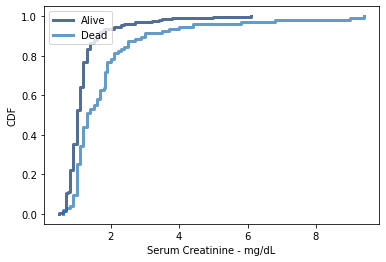

In [18]:
# CDF Plot for Serum Creatinine for Dead vs Alive
cdfSCAlive = thinkstats2.Cdf(alive.serum_creatinine, label='Alive')
cdfSCDead = thinkstats2.Cdf(dead.serum_creatinine, label='Dead')
thinkplot.Cdf(cdfSCAlive)
thinkplot.Config(xlabel='Serum Creatinine - mg/dL', ylabel='CDF', loc='upper left')
thinkplot.Cdf(cdfSCDead)
thinkplot.Config(xlabel='Serum Creatinine - mg/dL', ylabel='CDF', loc='upper left')

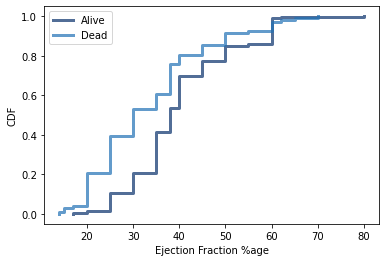

In [19]:
# CDF Plot for Ejection Fraction for Dead vs Alive
cdfEFAlive = thinkstats2.Cdf(alive.ejection_fraction, label='Alive')
cdfEFDead = thinkstats2.Cdf(dead.ejection_fraction, label='Dead')
thinkplot.Cdf(cdfEFAlive)
thinkplot.Config(xlabel='Ejection Fraction %age', ylabel='CDF', loc='upper left')
thinkplot.Cdf(cdfEFDead)
thinkplot.Config(xlabel='Ejection Fraction %age', ylabel='CDF', loc='upper left')

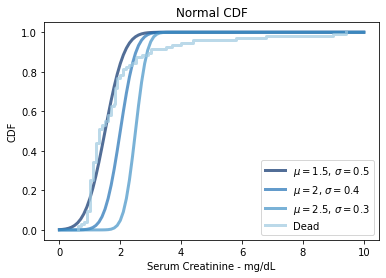

In [35]:
# Plotting only for Dead cdf, as it will give insight on Mortality
#cdfSCAlive = thinkstats2.Cdf(alive.serum_creatinine, label='Alive')
cdfSCDead = thinkstats2.Cdf(dead.serum_creatinine, label='Dead')

thinkplot.PrePlot(5)

# Plotting Normal Distribution
mus = [1.5, 2.0, 2.5]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, 
                                               low=0, high=10)
    label = r'$\mu=%g$, $\sigma=%g$' % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title='Normal CDF', xlabel='x', ylabel='CDF')

#thinkplot.Cdf(cdfSCAlive)
thinkplot.Cdf(cdfSCDead)
    
thinkplot.Config(title='Normal CDF', xlabel='Serum Creatinine - mg/dL', ylabel='CDF', 
                 loc='lower right')

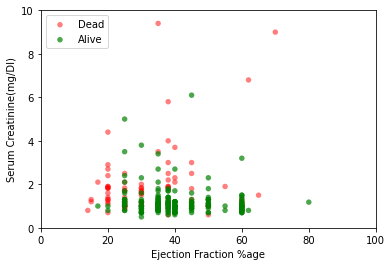

In [41]:
# Create two scatter plots comparing two variables and provide your analysis on correlation and causation.
# Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis

# Ejection Fraction vs Serum Creatinine in Dead Patients and Alive

thinkplot.Scatter(dead.ejection_fraction, dead.serum_creatinine, alpha=0.5, label = 'Dead', color = 'RED')
thinkplot.Scatter(alive.ejection_fraction, alive.serum_creatinine, alpha=0.7, label = 'Alive', color = 'GREEN')
thinkplot.Config(xlabel='Ejection Fraction %age',
                 ylabel='Serum Creatinine(mg/Dl)',
                 axis=[0, 100, 0, 10],
                 legend=True, loc='upper left')

In [52]:
display("DEAD - Covariance between Ejection Fraction & Serum Creatinine",
        np.cov(dead.ejection_fraction,dead.serum_creatinine))
display("DEAD - Correlation Coefficient between Ejection Fraction & Serum Creatinine",
        np.corrcoef(dead.ejection_fraction, dead.serum_creatinine))
display("ALIVE - Covariance between Ejection Fraction & Serum Creatinine",
        np.cov(alive.ejection_fraction,alive.serum_creatinine))
display("ALIVE - Correlation Coefficient between Ejection Fraction & Serum Creatinine",
        np.corrcoef(alive.ejection_fraction, alive.serum_creatinine))

'DEAD - Covariance between Ejection Fraction & Serum Creatinine'

array([[156.88322368,   4.22207895],
       [  4.22207895,   2.15667298]])

'DEAD - Correlation Coefficient between Ejection Fraction & Serum Creatinine'

array([[1.        , 0.22953343],
       [0.22953343, 1.        ]])

'ALIVE - Covariance between Ejection Fraction & Serum Creatinine'

array([[117.93878945,  -0.76209579],
       [ -0.76209579,   0.42782412]])

'ALIVE - Correlation Coefficient between Ejection Fraction & Serum Creatinine'

array([[ 1.        , -0.10728737],
       [-0.10728737,  1.        ]])

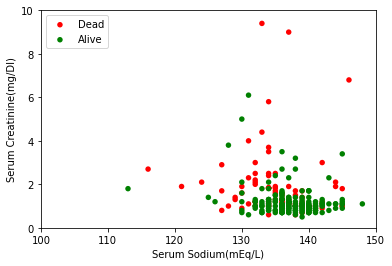

In [38]:
# Serum Sodium vs Serum Creatinine in Dead Patients and Alive

thinkplot.Scatter(dead.serum_sodium, dead.serum_creatinine, alpha=1.0, label = 'Dead', color = 'RED')
thinkplot.Scatter(alive.serum_sodium, alive.serum_creatinine, alpha=1.0, label = 'Alive', color = 'GREEN')
thinkplot.Config(xlabel='Serum Sodium(mEq/L)',
                 ylabel='Serum Creatinine(mg/Dl)',
                 axis=[100, 150, 0, 10],
                 legend=True, loc='upper left')

In [53]:
display("DEAD - Covariance between Serum Sodium & Serum Creatinine",
        np.cov(dead.serum_sodium,dead.serum_creatinine))
display("DEAD - Correlation Coefficient between Serum Sodium & Serum Creatinine",
        np.corrcoef(dead.serum_sodium, dead.serum_creatinine))
display("ALIVE - Covariance between Serum Sodium & Serum Creatinine",
        np.cov(alive.serum_sodium,alive.serum_creatinine))
display("ALIVE - Correlation Coefficient between Serum Sodium & Serum Creatinine",
        np.corrcoef(alive.serum_sodium, alive.serum_creatinine))

'DEAD - Covariance between Serum Sodium & Serum Creatinine'

array([[25.01578947, -0.69052632],
       [-0.69052632,  2.15667298]])

'DEAD - Correlation Coefficient between Serum Sodium & Serum Creatinine'

array([[ 1.       , -0.0940115],
       [-0.0940115,  1.       ]])

'ALIVE - Covariance between Serum Sodium & Serum Creatinine'

array([[15.86367849, -0.56180486],
       [-0.56180486,  0.42782412]])

'ALIVE - Correlation Coefficient between Serum Sodium & Serum Creatinine'

array([[ 1.        , -0.21565072],
       [-0.21565072,  1.        ]])

We see from the Scatter Plot, as well as the Covariance and Correlation Coefficient values that there seems to be very weak relation between the variables(Ejection Fraction vs Serum Creatinine & Serum Creatinine vs Serum Sodium).
The correlation coefficient values for both dead and alive dataset show weak correlation.
The correlation coefficients in all the scenarios remained less the absolute value of 22% approx. Hence the parameters dont seem to be correlated

In [160]:
# Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

# So we will test the hypothesis that
# 1. Ejection Fraction is lower for Dead Patients vs Alive Patients. Hence it is an indicator of high risk for Mortality
# 2. Serum Creatinine is higher for Dead Patients vs Alive Patients. Hence it is an indicator of high risk for Mortality

# To test the hypothesis we will check means of the both
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        #display("1", group1.mean(),"2", group2.mean())
        test_stat = (group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data


# 1. Ejection Fraction is lower for Dead Patients vs Alive Patients.
# Thats why passing alive first and dead as second data.
# TestStatistics is measuring the value 1 - 2 mean
data = alive.ejection_fraction.values, dead.ejection_fraction.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

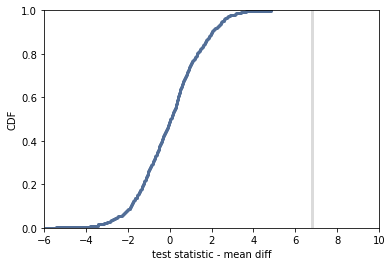

In [163]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic - mean diff', axis=[-6, 10, 0, 1],
                   ylabel='CDF')

In [164]:
# 2. Serum Creatinine is higher for Dead Patients vs Alive Patients
# Thats why passing dead first and alive as second data.
# TestStatistics is measuring the value 1 - 2 mean
data = dead.serum_creatinine.values, alive.serum_creatinine.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

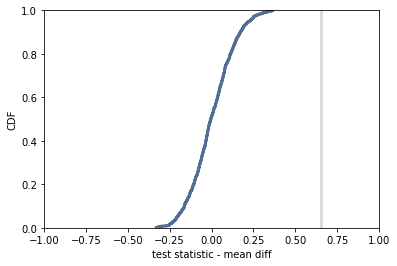

In [165]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic - mean diff', axis=[-1, 1, 0, 1],
                   ylabel='CDF')

In [166]:
def RunTests(clinical_df, iters=1000):
    
    n = len(clinical_df)
    # alive and dead dataset is already split above

    # Permutation Test
    # Ejection Fraction is lower for Dead Patients vs Alive Patients
    data = alive.ejection_fraction.values, dead.ejection_fraction.values
    ht = DiffMeansPermute(data)
    p1 = ht.PValue(iters=iters)
    
    # Serum Creatinine is higher for Dead Patients vs Alive Patients
    data = (dead.serum_creatinine.values,
            alive.serum_creatinine.values)
    ht = DiffMeansPermute(data)
    p2 = ht.PValue(iters=iters)
    
    print('%d\t%0.2f\t%0.2f' % (n, p1, p2))

In [167]:
n = len(clinical_df)
for _ in range(7):
    sample = thinkstats2.SampleRows(clinical_df, n)
    RunTests(sample)
    n //= 2

299	0.00	0.00
149	0.00	0.00
74	0.00	0.00
37	0.00	0.00
18	0.00	0.00
9	0.00	0.00
4	0.00	0.00


Conclusion: 
The tests for test1, test2 are positive throughout.
However this pattern may change if we could get large datasets. This is not evident, this is only my  assumption as 299 is a very small number of patients that we are using for this hypothesis.
Still based on our data, we may say our hypothesis is right.

In [172]:
# For this project, conduct a regression analysis on either one dependent and one explanatory variable,
# or multiple explanatory variables (Chapter 10 & 11)

# For the project we will predict the mortality, which is DEATH_EVENT in the dataset
# We will try to see the effect of Ejection Fraction, Serum Creatinine, Serum Sodium and Age on the same
# Since the dependent variable is a binary value, we will use Logistic Regression - Binomial.
import statsmodels.formula.api as smf
import pandas as pd

formula = 'DEATH_EVENT ~ ejection_fraction + serum_sodium + serum_creatinine + age'
model = smf.logit(formula, data=clinical_df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.506839
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            4
Date:                Sun, 15 Nov 2020   Pseudo R-squ.:                  0.1925
Time:                        19:16:17   Log-Likelihood:                -151.54
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 7.566e-15
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.0939      4.456      0.919      0.358      -4.639      12.827
ejection_fraction    -0.0665      0.014     -4.655      0.000      -0.095      -0.039
serum_sodium         -0.0477      0.032     -1.472      0.141      -0.111       0.016
serum_creatinine      0.6317      0.158      3.987      0.000       0.321       0.942
age                   0.0514      0.012      4.166      0.000       0.027       0.076
=====================================================================================
"""

In [173]:
predict = (results.predict() >= 0.5)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)
sum(true_pos), sum(true_neg)

(44.0, 184.0)

In [174]:
acc = (sum(true_pos) + sum(true_neg)) / len(actual)
acc

0.7625418060200669

The above model shows and accuracy of 76.25%

In [175]:
# We may provide values here to predict the mortality
columns = ['ejection_fraction', 'serum_sodium', 'serum_creatinine', 'age']
new = pd.DataFrame([[90, 120, 1.3, 35]], columns=columns)
y = results.predict(new)
y

0    0.006753
dtype: float64

If we try to understand the values - Ejection Fraction of 90% is of a healthy person, Serum Sodium of 120 is of a healthy person, Serum Creatinine 1.3 is also of a healthy person and age 35.
So the Risk of Mortality came as 0.7% approx.